# Achando coordenadas a partir de distâncias

### #1: Três pontos em 1D

Tomemos um exemplo simples com os pontos 0, 2 e 4 em uma reta.

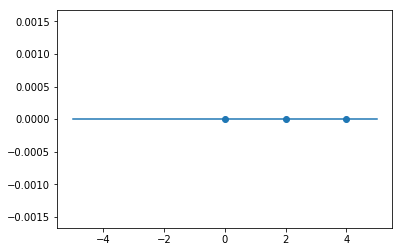

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ans = np.array([0, 2, 4])

plt.plot([-5, 5], [0, 0])
plt.scatter(ans, np.zeros(ans.shape))
plt.show()

Como não sabemos se existe uma solução exata para o problema, uma boa saída é usar uma abordagem de minimização de erro.

O erro nesse caso seria calculado por

$$
    \min \sum_i^3 \sum_{j, j>i}^3 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Podemos simplificar o problema se fixarmos um dos pontos na origem - por exemplo $\lambda_1$.

$$
    \min (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2
$$

Onde $\lambda_i$ representa o calor de cada ponto na reta real.

Podemos chamar de $f$ a função que queremos minimizar e em seguida tirar seu gradiente para utilizar na minimização.

$$
    f = (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2
$$

$$
    \nabla f =
    \begin{bmatrix}
        \frac{\partial}{\partial \lambda_2}((\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2) \\
         \frac{\partial}{\partial \lambda_3}((\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2)
    \end{bmatrix}
$$

$$
    \nabla f =
    \begin{bmatrix}
        4\lambda_2(\lambda_2^2 - d_{12}^2) + 4(\lambda_2 - \lambda_3)((\lambda_2 - \lambda_3)^2 - d_{23}^2) \\
        4\lambda_3(\lambda_3^2 - d_{13}^2) - 4(\lambda_2 - \lambda_3)((\lambda_2 - \lambda_3)^2 - d_{23}^2)
    \end{bmatrix}
$$


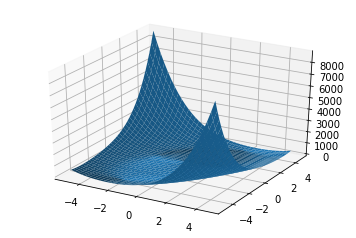

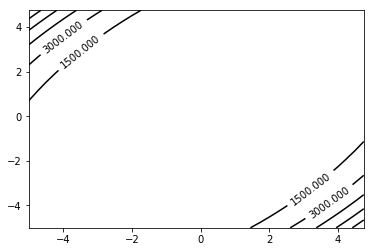

In [22]:
dists = np.array([[0, 2, 4], [2, 0, 2], [4, 2, 0]])

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X**2 - dists[0][1]**2)**2 + (Y**2 - dists[0][2]**2)**2 + ((X - Y)**2 - dists[1][2]**2)**2

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot da superfície em 3D
ax.plot_surface(X, Y, Z)
plt.show()

#Curvas de nível
error = plt.contour(X, Y, Z, colors="k")
plt.clabel(error, inline=1, fontsize=10)
plt.show()

# #Campo vetorial do gradiente
# f_Dx = 4 * (X * (X**2 - dists[0][1]**2) + (X - Y) * ((X - Y)**2 - dists[1][2]**2))
# f_Dy = 4 * (Y * (Y**2 - dists[0][2]**2) - (X - Y) * ((X - Y)**2 - dists[1][2]**2))
# ax.quiver(X, Y, f_Dx, f_Dy, color="#666666") # ¯\_(ツ)_/¯
# plt.draw()
# plt.show()

A princípcio, olhando para os plots da função e o resultado do gradiente, não é óbvio como encontrar os pontos críticos. Podemos tentar, então uma abordagem de aproximação numérica.

Apenas com o intuito de verificar se conseguimos achar facilmente a resposta desse problema, implementemos o algoritmo de *Gradient Descent*. Esse algoritmo é extremamente simples e consiste apenas em escolher um chute inicial para a solução e seguir o sentido inverso do gradiente da função de erro. Como o gradiente nos mostra a direção de crescimento, ao seguir o caminho contrário, andamos na direção de decrescimento.

Initial guess: [ 0.70252981  0.60264052]
Final answer: [ 2.  4.]


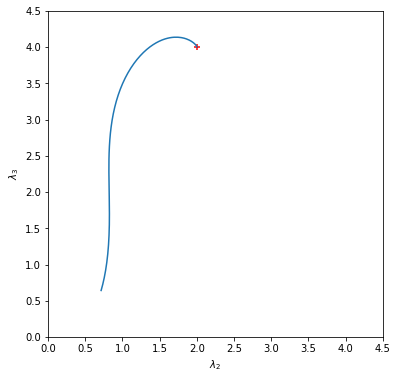

In [49]:
points = np.random.rand(2)
lr = 0.001
decay = 1.0
steps = []
print("Initial guess:", points)
for i in range(300):
#     print(i, points)
    grad = np.array(
        [4 * (points[0] * (points[0]**2 - dists[0][1]**2) + (points[0] - points[1]) * ((points[0] - points[1])**2 - dists[1][2]**2)),
        4 * (points[1] * (points[1]**2 - dists[0][2]**2) + (points[0] - points[1]) * ((points[0] - points[1])**2 - dists[1][2]**2))])
    temp = points - lr * grad
    points = temp
    lr *= decay
    steps.append(temp)
print("Final answer:", points)

#Plot do caminho da solução
steps = np.array(steps)
plt.figure(figsize=(6,6))
plt.plot(steps[:, 0], steps[:, 1])
#Solução ideal
plt.scatter([2],[4], marker="+", c="red")
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_3$")
plt.xlim((0,4.5))
plt.ylim((0,4.5))
plt.show()

### #2: Quatro pontos em 1D
Como vemos com o resultado acima, o algoritmo encontrou o resultado exato rapidamente. Tomemos como próximo passo a adição de um quarto ponto no problema.

Agora a função que queremos minimizar passa a ser a seuinte:

$$
    f = (\lambda_2^2 - d_{12}^2)^2 + (\lambda_3^2 - d_{13}^2)^2 + (\lambda_4^2 - d_{14}^2)^2 + ((\lambda_2 - \lambda_3)^2 - d_{23}^2)^2 + ((\lambda_2 - \lambda_4)^2 - d_{24}^2)^2 + ((\lambda_3 - \lambda_4)^2 - d_{34}^2)^2
$$

Na forma expandida, a função fica muito grande, podemos escrevê-la em uma notação mais enxuta (lembre-se que assumimos o primeiro ponto como sendo a origem).

$$
    f = \sum_{i>1}^4 (\lambda_i^2 - d_{1i}^2)^2 + \sum_{i>1}^4 \sum_{j > i}^4 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Para simplificar, podemos o escrever a seguinte função que minimiza o mesmo problema:

$$
    f = \sum_{i>1}^4 (\lambda_i^2 - d_{1i}^2)^2 + \sum_{i>1}^4 \sum_{j>1}^4 ((\lambda_i - \lambda_j)^2 - d_{ij}^2)^2
$$

Agora tomemos o gradiente dessa função:

$$
    \nabla f = 
    \begin{bmatrix}
        4\lambda_2(\lambda_2^2 - d_{12}^2) + \sum_{i>1}^4 8(\lambda_2 - \lambda_i)((\lambda_2 - \lambda_i)^2 - d_{2i}^2)\\
        4\lambda_3(\lambda_3^2 - d_{13}^2) + \sum_{i>1}^4 8(\lambda_3 - \lambda_i)((\lambda_3 - \lambda_i)^2 - d_{3i}^2)\\
        4\lambda_4(\lambda_4^2 - d_{14}^2) + \sum_{i>1}^4 8(\lambda_4 - \lambda_i)((\lambda_4 - \lambda_i)^2 - d_{4i}^2)
    \end{bmatrix}
$$

Usando o mesmo algoritmo acima, podemos encontrar os pontos que melhor se adequam às distâncias propostas.

Initial guess: [ 0.35278975  0.41948793  0.41682339]
Final answer: [ 2.  4.  5.]


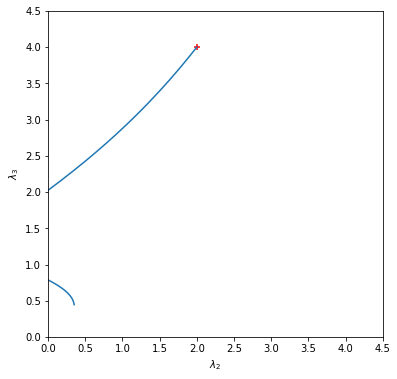

In [81]:
#pontos: 0, 2, 4, 5
pts4 = [0, 2, 4, 5]
dists4pts = np.array([pts4]*len(pts4))
dists4pts = dists4pts - dists4pts.T

guess4 = np.random.rand(len(pts4)-1)
lr = 0.001
decay = 1.0
steps = []
print("Initial guess:", guess4)

for _ in range(300):
    grad = np.zeros(guess4.shape)
    for i in range(guess4.shape[0]):
        grad[i] = 4 * guess4[i] * (guess4[i]**2 - dists4pts[0][i+1]**2)
        for j in range(guess4.shape[0]):
            if j > i:
                grad[i] += 8 * (guess4[i] - guess4[j]) * ((guess4[i] - guess4[j])**2 - dists4pts[i+1][j+1]**2)
    temp = guess4 - lr * grad
    lr *= decay
    steps.append(temp)
    guess4 = temp
    
print("Final answer:", guess4)

#Plot do caminho da solução
steps = np.array(steps)
plt.figure(figsize=(6,6))
plt.plot(steps[:, 0], steps[:, 1])
#Solução ideal
plt.scatter([2],[4], marker="+", c="red")
plt.xlabel("$\lambda_2$")
plt.ylabel("$\lambda_3$")
plt.xlim((0,4.5))
plt.ylim((0,4.5))
plt.show()